In [0]:
#--import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
from IPython.display import display, Markdown
from string import punctuation
from nltk.corpus import stopwords
from nltk import ngrams, FreqDist, word_tokenize
from nltk.stem import PorterStemmer

# ADMIN Anaconda prompt --- pip install wordcloud
from wordcloud import WordCloud

#-----RUN THESE LINES 1 time then COMMENT OUT #
#nltk.download('stopwords')
#nltk.download('punkt')

In [0]:
#-- use glob: a Unix style pathname pattern expansion toolset to get all the .txt files in the working directory
import glob
txt_fileList = glob.glob("Y:/fa2018-csc300dsa/completed/Assignment10/Data/*.txt")
display(Markdown('##### --- List of Speechs as text files ---'))
txt_fileList

##### --- List of Speechs as text files ---

['Y:/fa2018-csc300dsa/completed/Assignment10/Data\\GeorgeWashington-InaguralSpeech.txt',
 'Y:/fa2018-csc300dsa/completed/Assignment10/Data\\JFK-InagurationSpeech.txt',
 'Y:/fa2018-csc300dsa/completed/Assignment10/Data\\MirielliTEXT.txt',
 'Y:/fa2018-csc300dsa/completed/Assignment10/Data\\Obama-InaguralSpeech-1.txt',
 'Y:/fa2018-csc300dsa/completed/Assignment10/Data\\Trump-InagurationSpeech.txt',
 'Y:/fa2018-csc300dsa/completed/Assignment10/Data\\WChurchill-ICSpeech.txt']

In [0]:
#--intantiate the stop word list and porter stemming algorithm
stop_words = stopwords.words('english') + list(punctuation)
ps = PorterStemmer()

#--set variables for selecting speech file by index in txt_fileList
speechSELECTEDindex1 = 3
speechSELECTEDindex2 = 4

#--open speech 1 file
file = open(txt_fileList[speechSELECTEDindex1], 'r') 
speechText1 = file.read()
file.close()

#--open speech 2 file
file = open(txt_fileList[speechSELECTEDindex2], 'r') 
speechText2 = file.read()
file.close()

#--remove new line markers from file
speechText1  = speechText1.replace("\n", "")
speechText2  = speechText2.replace("\n", "")

display(Markdown('## --------- SPEECH NOT Normalized ------------'))
print(speechText1)
#print(speechText2)

## --------- SPEECH NOT Normalized ------------

My fellow citizens: I stand here today humbled by the task before us, grateful for the trust you've bestowed, mindful of the sacrifices borne by our ancestors. I thank President Bush for his service to our nation -- as well as the generosity and cooperation he has shown throughout this transition.Forty-four Americans have now taken the presidential oath. The words have been spoken during rising tides of prosperity and the still waters of peace. Yet, every so often, the oath is taken amidst gathering clouds and raging storms. At these moments, America has carried on not simply because of the skill or vision of those in high office, but because we, the people, have remained faithful to the ideals of our forebears and true to our founding documents. So it has been; so it must be with this generation of Americans.That we are in the midst of crisis is now well understood. Our nation is at war against a far-reaching network of violence and hatred. Our economy is badly weakened, a consequence

In [0]:
#--normalize the speech text

#--remove punctuations, numbers and special characters
speechText1_clean = speechText1.replace("[^a-zA-Z]", " ")
speechText1_clean = speechText1_clean.replace('“', ' ')
speechText1_clean = speechText1_clean.replace('”', ' ')
speechText1_clean = speechText1_clean.replace('.', ' ')
speechText1_clean = speechText1_clean.replace('-', ' ')
speechText1_clean = speechText1_clean.replace('’', '')
speechText1_clean = speechText1_clean.replace('  ', ' ')
speechText1_clean = speechText1_clean.lower()

speechText2_clean = speechText2.replace("[^a-zA-Z]", " ")
speechText2_clean = speechText2_clean.replace('“', ' ')
speechText2_clean = speechText2_clean.replace('”', ' ')
speechText2_clean = speechText2_clean.replace('.', ' ')
speechText2_clean = speechText2_clean.replace('-', ' ')
speechText2_clean = speechText2_clean.replace('’', '')
speechText2_clean = speechText2_clean.replace('  ', ' ')
speechText2_clean = speechText2_clean.lower()

#--retokenize the clean text version of the speeches for further normlization
speechText1_words = word_tokenize(speechText1_clean)
speechText2_words = word_tokenize(speechText2_clean)

#--stem the words using the porter stemming algorithm
speechText1_words = [ps.stem(word) for word in speechText1_words]
speechText2_words = [ps.stem(word) for word in speechText2_words]

#--remove_stopwords from word list
speechText1_clean = " ".join([i for i in speechText1_words if i not in stop_words])
speechText2_clean = " ".join([i for i in speechText2_words if i not in stop_words])

#--retokenize the clean normalized text
speechText1_words = word_tokenize(speechText1_clean)
speechText2_words = word_tokenize(speechText2_clean)

display(Markdown('## --------- SPEECH TEXT Normalized - cleaned and stemmed ------------'))
print(speechText1_clean)
display(Markdown('## --------- SPEECH TEXT Normalized - Tokenized Word List ------------'))
print(speechText1_words)

## --------- SPEECH TEXT Normalized - cleaned and stemmed ------------

fellow citizen stand today humbl task befor us grate trust 've bestow mind sacrific born ancestor thank presid bush hi servic nation well generos cooper ha shown throughout thi transit forti four american taken presidenti oath word spoken dure rise tide prosper still water peac yet everi often oath taken amidst gather cloud rage storm moment america ha carri simpli becaus skill vision high offic becaus peopl remain faith ideal forebear true found document ha must thi gener american midst crisi well understood nation war far reach network violenc hatr economi badli weaken consequ greed irrespons part also collect failur make hard choic prepar nation new age home lost job shed busi shutter health care costli school fail mani day bring evid way use energi strengthen adversari threaten planet indic crisi subject data statist less measur less profound sap confid across land nag fear america 's declin inevit next gener must lower sight today say challeng face real seriou mani met easili shor

## --------- SPEECH TEXT Normalized - Tokenized Word List ------------

['fellow', 'citizen', 'stand', 'today', 'humbl', 'task', 'befor', 'us', 'grate', 'trust', "'ve", 'bestow', 'mind', 'sacrific', 'born', 'ancestor', 'thank', 'presid', 'bush', 'hi', 'servic', 'nation', 'well', 'generos', 'cooper', 'ha', 'shown', 'throughout', 'thi', 'transit', 'forti', 'four', 'american', 'taken', 'presidenti', 'oath', 'word', 'spoken', 'dure', 'rise', 'tide', 'prosper', 'still', 'water', 'peac', 'yet', 'everi', 'often', 'oath', 'taken', 'amidst', 'gather', 'cloud', 'rage', 'storm', 'moment', 'america', 'ha', 'carri', 'simpli', 'becaus', 'skill', 'vision', 'high', 'offic', 'becaus', 'peopl', 'remain', 'faith', 'ideal', 'forebear', 'true', 'found', 'document', 'ha', 'must', 'thi', 'gener', 'american', 'midst', 'crisi', 'well', 'understood', 'nation', 'war', 'far', 'reach', 'network', 'violenc', 'hatr', 'economi', 'badli', 'weaken', 'consequ', 'greed', 'irrespons', 'part', 'also', 'collect', 'failur', 'make', 'hard', 'choic', 'prepar', 'nation', 'new', 'age', 'home', 'lost

In [0]:
#--generate word frequencies for each speech word list

display(Markdown('#### ------- Word Frequency Lists for each speech document ------'))
speechText1_words_fdist = FreqDist(speechText1_words)
#display(type(speechText1_words_fdist))
display(speechText1_words_fdist)

speechText2_words_fdist = FreqDist(speechText2_words)
#display(type(speechText2_words_fdist))
display(speechText2_words_fdist)

#### ------- Word Frequency Lists for each speech document ------

FreqDist({'thi': 24, 'us': 23, 'nation': 15, 'ha': 14, 'new': 11, "'s": 11, 'america': 10, 'gener': 9, 'must': 8, 'becaus': 8, ...})

FreqDist({'america': 18, 'american': 16, 'nation': 13, 'countri': 12, '–': 11, 'thi': 10, 'one': 9, 'peopl': 9, 'protect': 7, 'everi': 7, ...})

### ---- Word Cloud for document = Y:/fa2018-csc300dsa/completed/Assignment10/Data\Obama-InaguralSpeech-1.txt -----

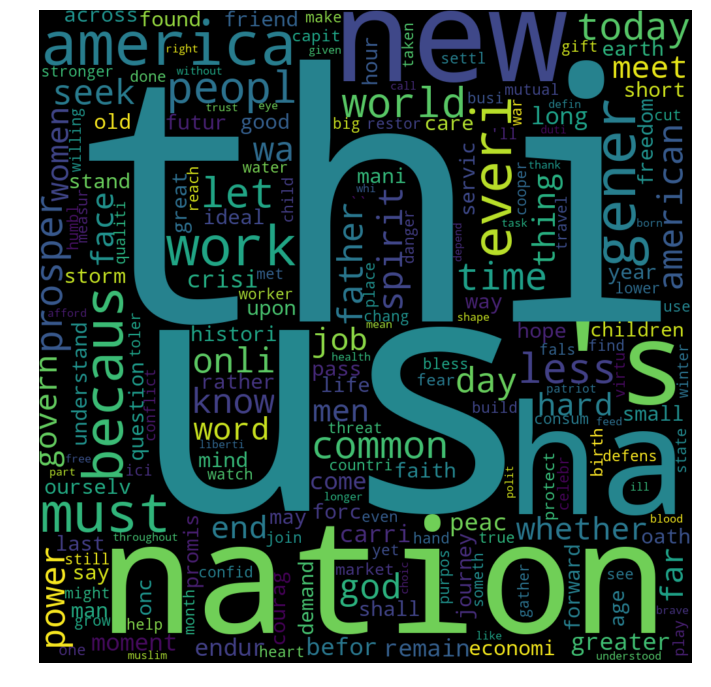

In [0]:
#--Summarize text as a word cloud ( TEXT -1 )
import matplotlib.pyplot as plty
display(Markdown('### ---- Word Cloud for document = ' + str(txt_fileList[3]) + ' -----'))
wc = WordCloud(width=1000,height=1000).generate_from_frequencies(speechText1_words_fdist)

plty.figure(figsize=(12, 12))
plty.imshow(wc, interpolation='bilinear')
plty.axis("off")
plty.show()

### ---- Word Cloud for document = Y:/fa2018-csc300dsa/completed/Assignment10/Data\Trump-InagurationSpeech.txt -----

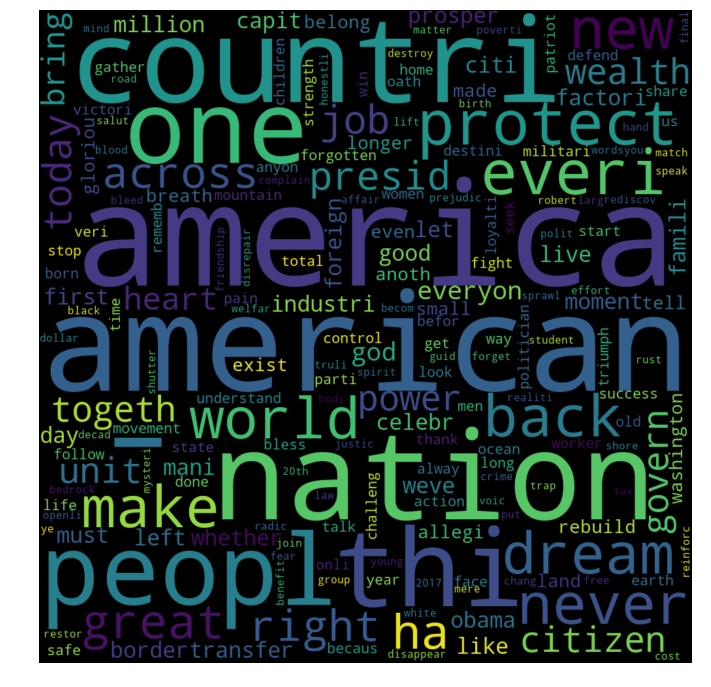

In [0]:
#--Summarize text as a word cloud (TEXT - 2)
import matplotlib.pyplot as plty
display(Markdown('### ---- Word Cloud for document = ' + str(txt_fileList[4]) + ' -----'))
wc = WordCloud(width=1000,height=1000).generate_from_frequencies(speechText2_words_fdist)

plty.figure(figsize=(12, 12))
plty.imshow(wc, interpolation='bilinear')
plty.axis("off")
plty.show()

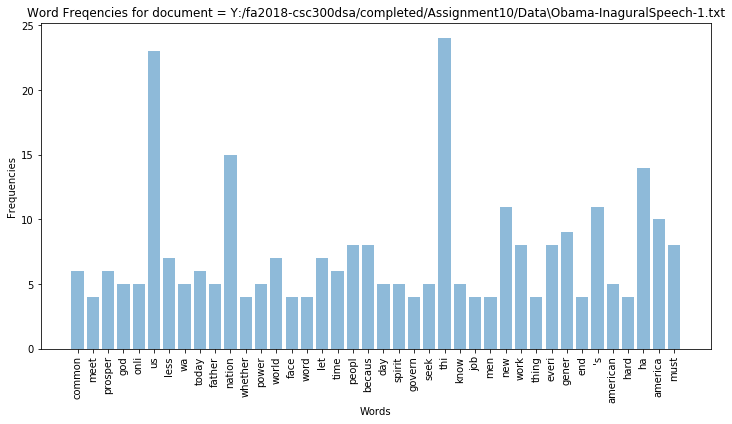

In [0]:
#--Plot of a subset of the most frequently occuring words (TEXT 1)
dataSUBSET = dict(speechText1_words_fdist.most_common(40))


y_pos = np.arange(len(dataSUBSET.items())) 
plt.figure(figsize=(12, 6))
plt.bar(y_pos, dataSUBSET.values(), align='center', alpha=0.5)
plt.xticks(y_pos, dataSUBSET.keys(), rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Word Freqencies for document = ' + str(txt_fileList[3]))
 
plt.show()

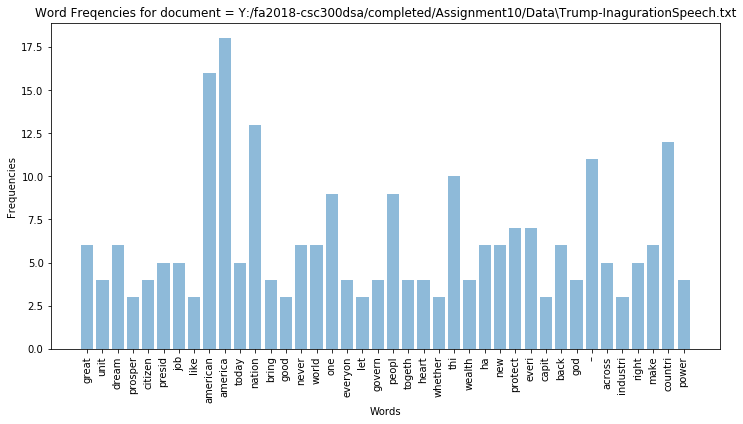

In [0]:
#--Plot of a subset of the most frequently occuring words(TEXT 2) 
dataSUBSET = dict(speechText2_words_fdist.most_common(40))


y_pos = np.arange(len(dataSUBSET.items())) 
plt.figure(figsize=(12, 6))
plt.bar(y_pos, dataSUBSET.values(), align='center', alpha=0.5)
plt.xticks(y_pos, dataSUBSET.keys(), rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Word Freqencies for document = ' + str(txt_fileList[4]))
 
plt.show()

In [0]:
#--Calulate the similarity between the two speeches

import math
from collections import Counter
from nltk import cluster

#--manualy compute cosine similarity as a check...
def cosine_similarity(a,b):
    dot_product= np.dot(a,b)
    return dot_product/math.sqrt(np.dot(a,a)*np.dot(b,b))

def jaccard_similarity(x,y):
    intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
    union_cardinality = len(set.union(*[set(x), set(y)]))
    return intersection_cardinality/float(union_cardinality)

def buildCommonVectors(iterable1, iterable2):
    counter1 = Counter(iterable1) #returns a Counter Collection of the list
    counter2 = Counter(iterable2) #returns a Counter Collection of the list
    all_items = set(counter1.keys()).union( set(counter2.keys()) ) # produces a SET of all the union of the keys of each collection
    vector1 = [counter1[k] for k in all_items] #iterates over all keys and makes LIST of the values for each word from each original list
    vector2 = [counter2[k] for k in all_items] #iterates over all keys and makes LIST of the values for each word from each original list
    return vector1, vector2

v1,v2= buildCommonVectors(speechText1_words, speechText2_words)
#--compute cosine similarity using NLTK method as a check...Why are these SO different?
display(Markdown('#### --- Document Similarity between documents = '+ str(txt_fileList[3]) + str(txt_fileList[4])))
print('nltk cosine distance  = ' + str(cluster.util.cosine_distance(v1,v2)))
print('cosine similarity = ' + str(cosine_similarity(v1, v2)))
print('jaccard similarity = ' + str(jaccard_similarity(v1, v2)))

#### --- Document Similarity between documents = Y:/fa2018-csc300dsa/completed/Assignment10/Data\Obama-InaguralSpeech-1.txtY:/fa2018-csc300dsa/completed/Assignment10/Data\Trump-InagurationSpeech.txt

nltk cosine distance  = 0.4681039594916464
cosine similarity = 0.5318960405083535
jaccard similarity = 0.55
